# Training

In [1]:
from pathlib import Path
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from torch.utils.data import Dataset, DataLoader
import torch
import json

# Add the root project directory to the Python path
ROOT = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(ROOT))
from configs.path_config import EXTRACTED_DATA_DIR, WEIGHTS_DIR, GROUP2S
from src.processing import dataset
from models import lstm_model
from src import utils

C:\Users\hpl886\Documents\Exjobb


In [2]:
folder_path = EXTRACTED_DATA_DIR / 'group2_south'
data = dataset.StrainDataset(folder_path, sequence_length=128, start_idx=11112, test_size=0.2)
train_loader = data.train_dataloader

# Model parameters
input_dim = data.feature_count
hidden_dim=16
num_layers=1
num_epochs=5
learning_rate=0.001

model = lstm_model.LSTMModel(input_dim, hidden_dim, num_layers)

losses, prediction = lstm_model.training_loop(model, train_loader, num_epochs, learning_rate)

train_loader = data.train_dataloader

c:\Users\hpl886\Documents\Exjobb\src\processing\dataset.py:45: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:281.)
  self.sequences = torch.tensor(self.sequences, dtype=torch.float32)
Epoch 1/5: 100%|██████████| 378/378 [00:01<00:00, 233.61batch/s]



Epoch 1/5, Average Loss: 0.0326



Epoch 2/5: 100%|██████████| 378/378 [00:01<00:00, 234.77batch/s]



Epoch 2/5, Average Loss: 0.0033



Epoch 3/5: 100%|██████████| 378/378 [00:01<00:00, 234.14batch/s]



Epoch 3/5, Average Loss: 0.0025



Epoch 4/5: 100%|██████████| 378/378 [00:01<00:00, 229.35batch/s]



Epoch 4/5, Average Loss: 0.0016



Epoch 5/5: 100%|██████████| 378/378 [00:01<00:00, 238.84batch/s]


Epoch 5/5, Average Loss: 0.0012



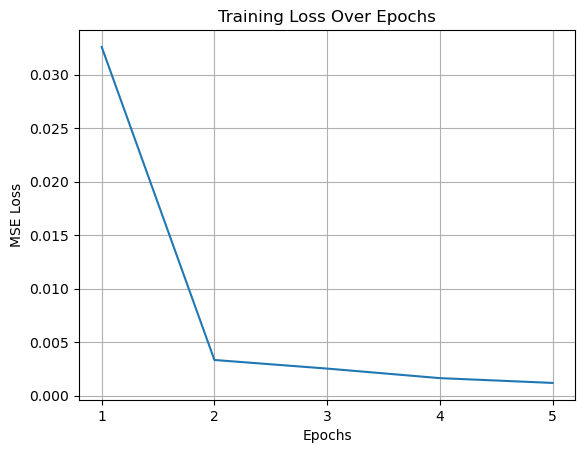

In [3]:
utils.plot_epochs_loss(num_epochs, losses)

timestamps shape: (3020,)


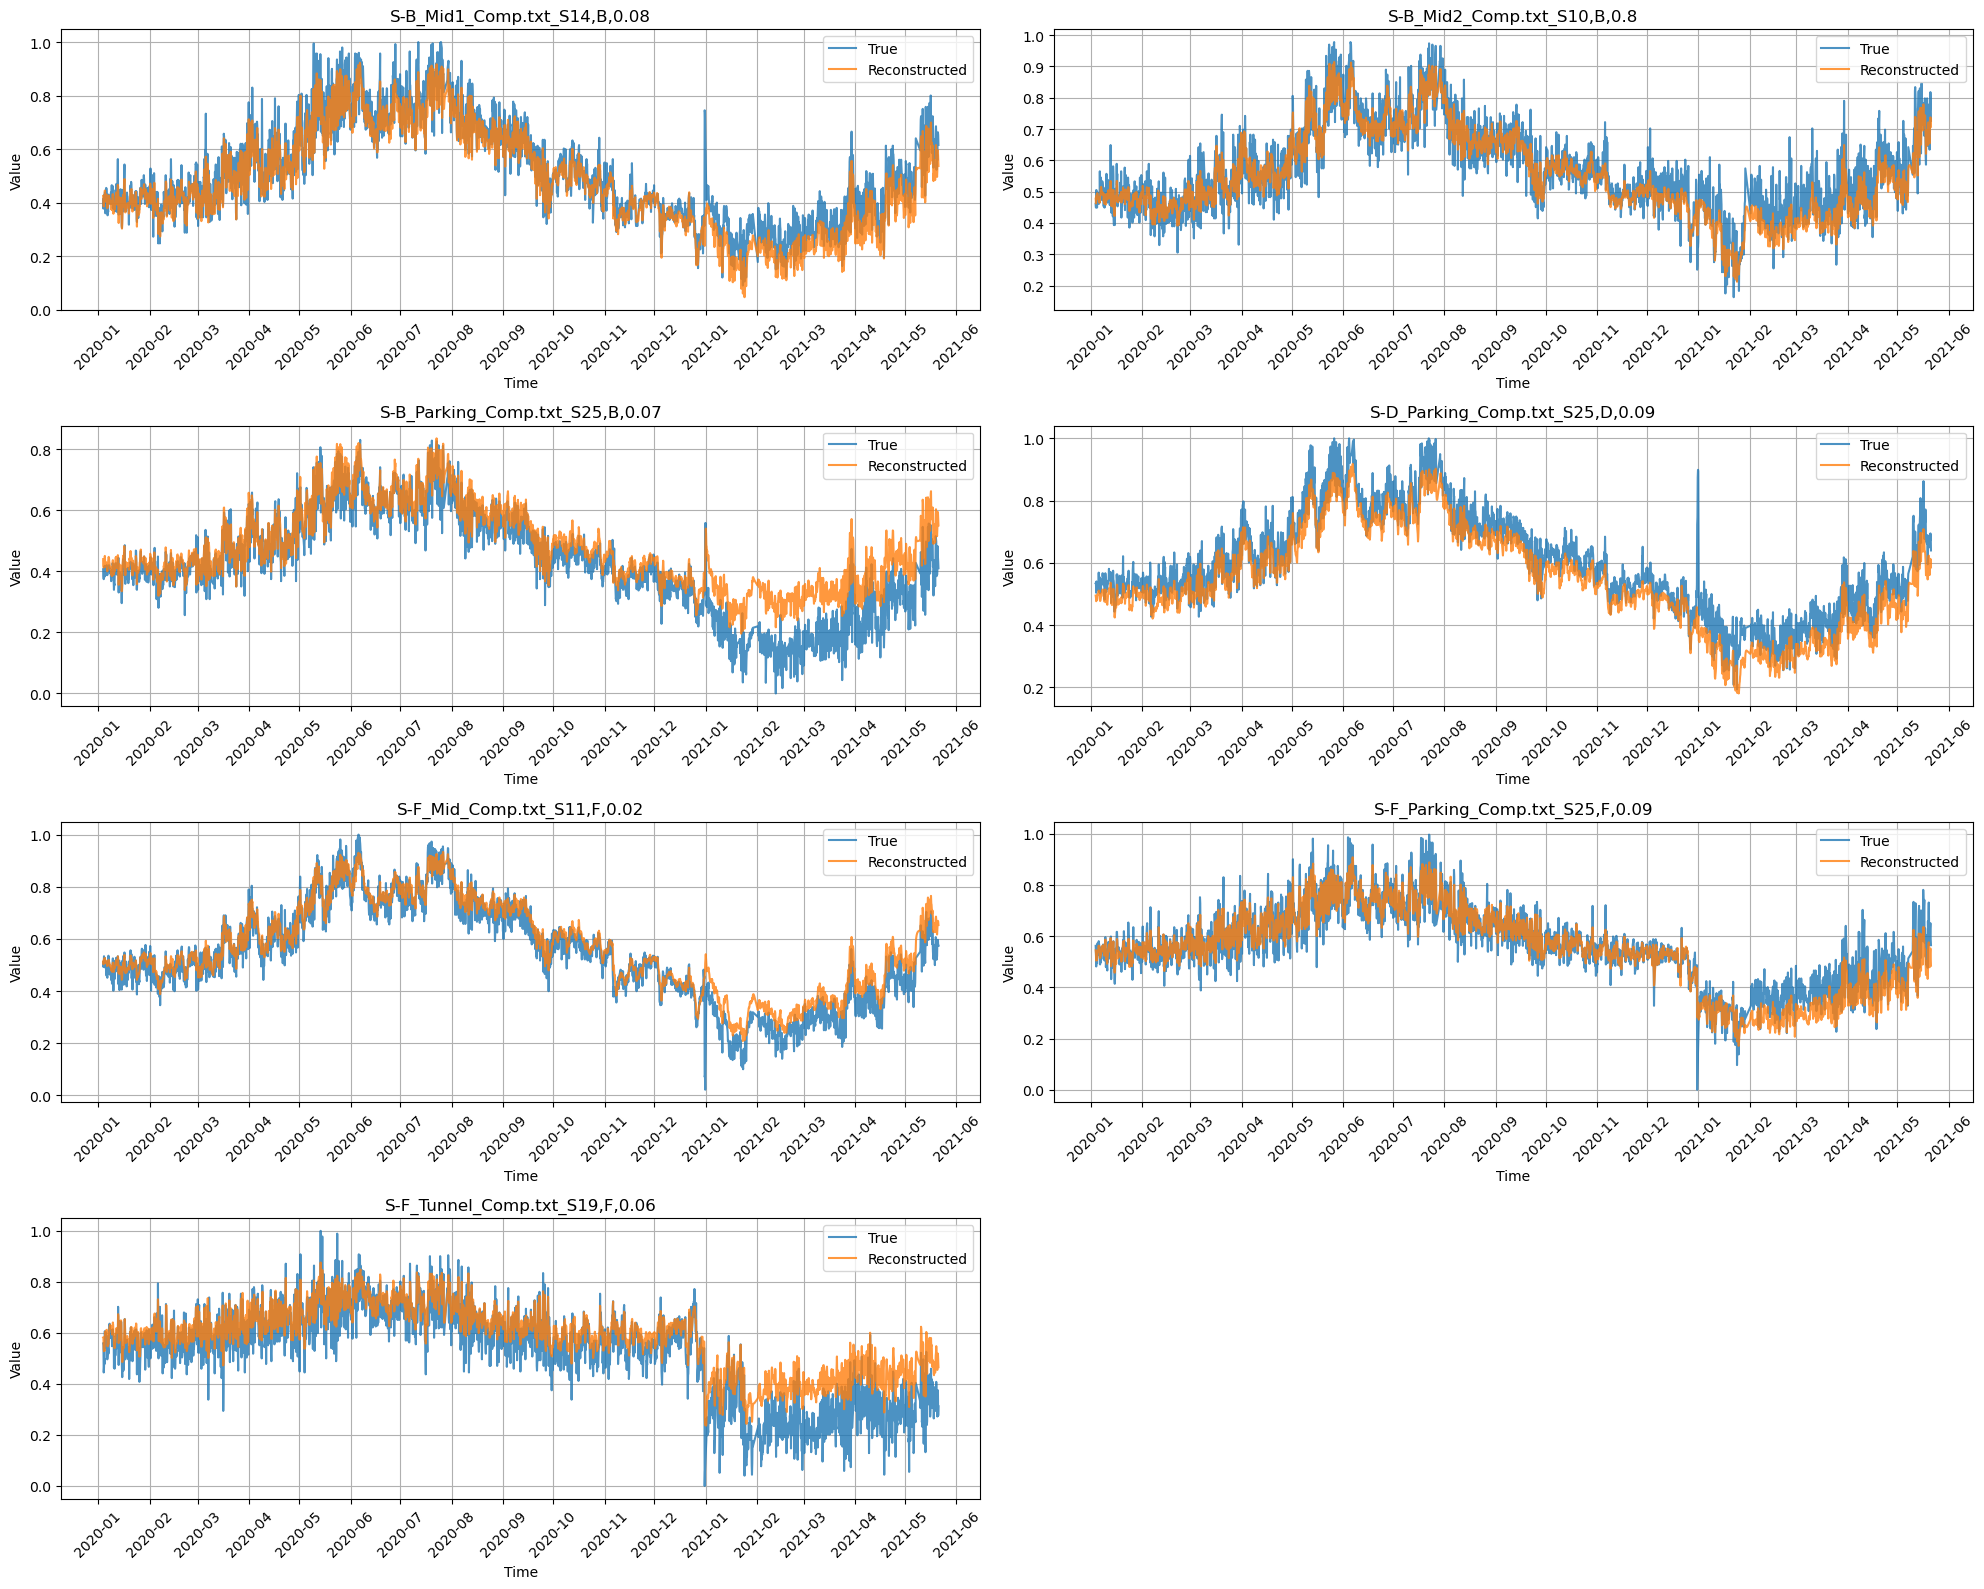

In [4]:
N = len(data.test_data)

feature_names = data.file_names
timestamps = pd.DatetimeIndex(np.concatenate(data.timestamps_test))[:N]

utils.plot_reconstruction(data.test_data, model, N, feature_names, timestamps)

In [7]:
print(f"original shape: {data.test_data.shape}")
print(f"reconstructed shape: {prediction.shape}")

original shape: torch.Size([3020, 128, 7])
reconstructed shape: torch.Size([14, 7])


In [5]:
utils.anomaly_score(data.test_data, prediction, timestamps, feature_names)

RuntimeError: The size of tensor a (128) must match the size of tensor b (14) at non-singleton dimension 1

In [ ]:
# import plotly.graph_objects as go
# import torch
# import numpy as np
# import pandas as pd

# # Get timestamps from data
# timestamps = data.get_timestamps()

# # Convert timestamps to a NumPy array and then to pandas datetime format
# timestamps = np.concatenate(timestamps)  # Flatten the list if needed
# timestamps = pd.to_datetime(timestamps)  # Convert to datetime format

# # Select fewer tick labels for better readability
# max_ticks = 10
# tick_indices = np.linspace(0, len(timestamps) - 1, num=max_ticks, dtype=int)
# tick_values = timestamps[tick_indices]
# tick_texts = tick_values.strftime("%Y-%m-%d %H:%M:%S")  # Format as readable strings

# # Convert train data and predictions to NumPy arrays
# train_data_np = data.train_data.cpu().numpy()
# prediction_np = prediction.detach().cpu().numpy()

# # Plotly figure setup
# fig = go.Figure()

# fig.add_trace(go.Scatter(x=timestamps, y=train_data_np, mode='lines', name='Original Data'))
# fig.add_trace(go.Scatter(x=timestamps, y=prediction_np, mode='lines', name='Reconstructed Data'))

# fig.update_layout(
#     title='LSTM Reconstruction vs. Original Data',
#     xaxis_title='Time',
#     yaxis_title='Strain',
#     template='plotly_white',
#     xaxis=dict(
#         tickmode='array',
#         tickvals=tick_values,  # Selected timestamps as tick positions
#         ticktext=tick_texts    # Formatted datetime labels
#     )
# )

# fig.show()
